In [33]:
#import the naccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
#importing datafile from the system 
from google.colab import files
uploaded = files.upload()

Saving ^NSEI.csv to ^NSEI (1).csv


In [35]:
#reading the file from the system 
import io
df = pd.read_csv(io.BytesIO(uploaded['^NSEI.csv']))
print(df)

            Date          Open          High           Low         Close  \
0     2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
1     2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
2     2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
3     2007-09-24   4837.149902   4941.149902   4837.149902   4932.200195   
4     2007-09-25   4939.100098   4953.899902   4878.149902   4938.850098   
...          ...           ...           ...           ...           ...   
3828  2023-03-20  17066.599609  17066.599609  16828.349609  16988.400391   
3829  2023-03-21  17060.400391  17127.699219  17016.000000  17107.500000   
3830  2023-03-22  17177.449219  17207.250000  17107.849609  17151.900391   
3831  2023-03-23  17097.400391  17205.400391  17045.300781  17076.900391   
3832  2023-03-24  17076.199219  17109.449219  16917.349609  16945.050781   

         Adj Close    Volume  
0      4732.350098       0.0  
1      4747.549805       

In [36]:
#calculating the number of rows and columns in the dataframe
df.shape

(3833, 7)

In [37]:
#Calculating the various nacessary details about the dataframe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3.803000e+03
mean,8804.420708,8855.465950,8738.383205,8798.095531,8798.095531,1.956260e+05
std,4091.686311,4101.742999,4071.916898,4087.612961,4087.612961,2.152449e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5456.650147,5497.275147,5411.774902,5457.750000,5457.750000,0.000000e+00
50%,8051.200195,8102.450195,7995.600098,8050.799805,8050.799805,1.616000e+05
75%,10996.725098,11050.850097,10904.125000,10993.399902,10993.399902,2.714500e+05
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,1.811000e+06


In [38]:
#Noticing the various parameters about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3833 non-null   object 
 1   Open       3803 non-null   float64
 2   High       3803 non-null   float64
 3   Low        3803 non-null   float64
 4   Close      3803 non-null   float64
 5   Adj Close  3803 non-null   float64
 6   Volume     3803 non-null   float64
dtypes: float64(6), object(1)
memory usage: 209.7+ KB


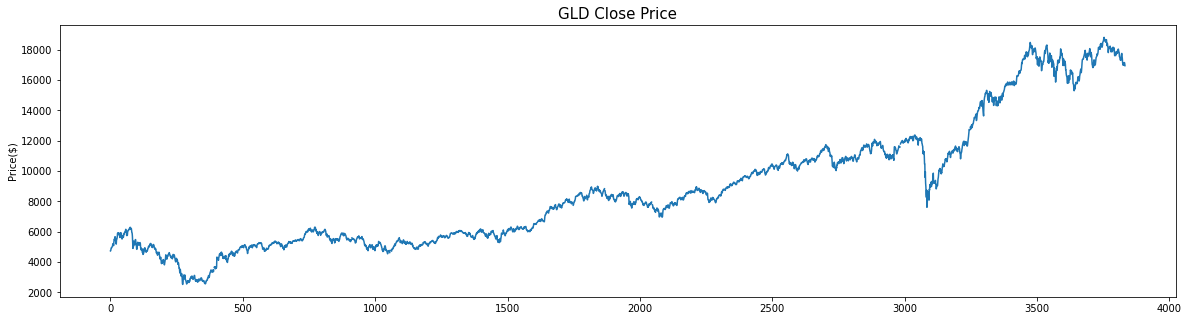

In [39]:
#Plotting the Close Price with Date
plt.figure(figsize=(20,5))
plt.plot(df['Close'])
plt.title('GLD Close Price', fontsize=15)
plt.ylabel('Price($)')
plt.show()

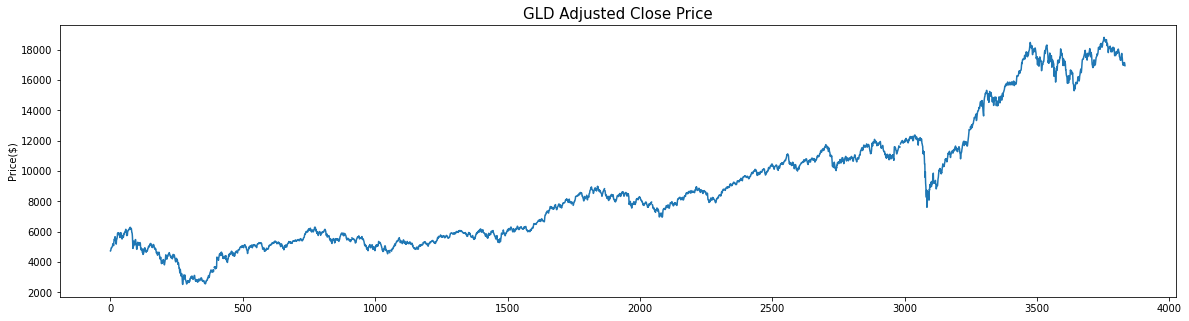

In [40]:
#Plotting the Adjusted Close Price with Date
plt.figure(figsize=(20,5))
plt.plot(df['Adj Close'])
plt.title('GLD Adjusted Close Price', fontsize=15)
plt.ylabel('Price($)')
plt.show()

The above two graphs show that there is very minimal difference in the values of Close Price and Adjusted Close Price.

In [41]:
#Dropping the Adjusted Close column in order to remove repitition of values
df = df.drop(['Adj Close'], axis=1)

In [12]:
#Finding the number of null values present in the dataframe
df.isnull().sum()

Date       0
Open      30
High      30
Low       30
Close     30
Volume    30
dtype: int64

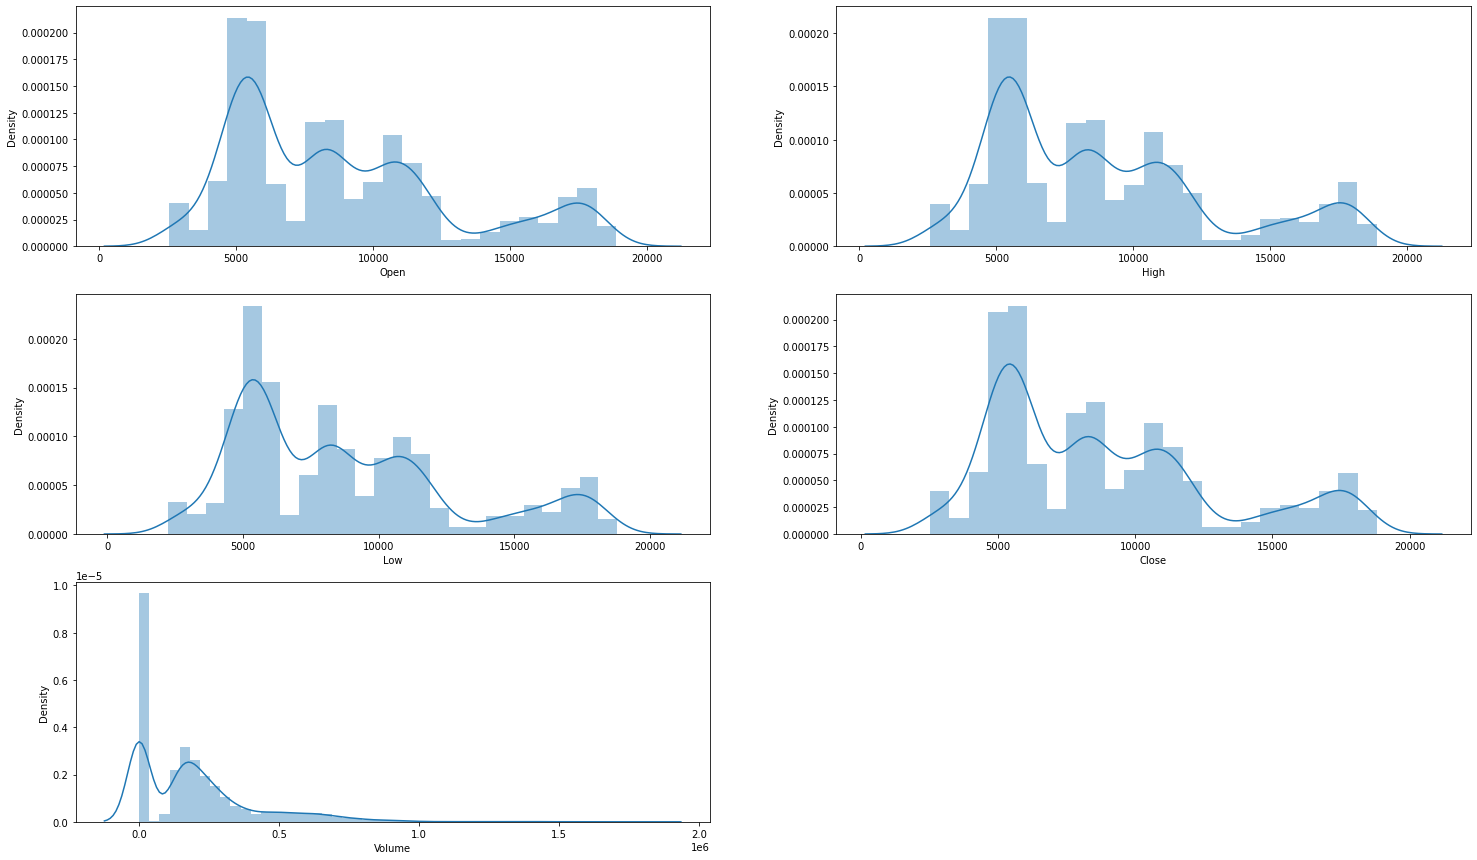

In [42]:
#Plotting the values of different parametrs separately in the form of Histogram
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(25,15))
 
for i, col in enumerate(features):
  plt.subplot(3,2,i+1)
  sb.distplot(df[col])
plt.show()

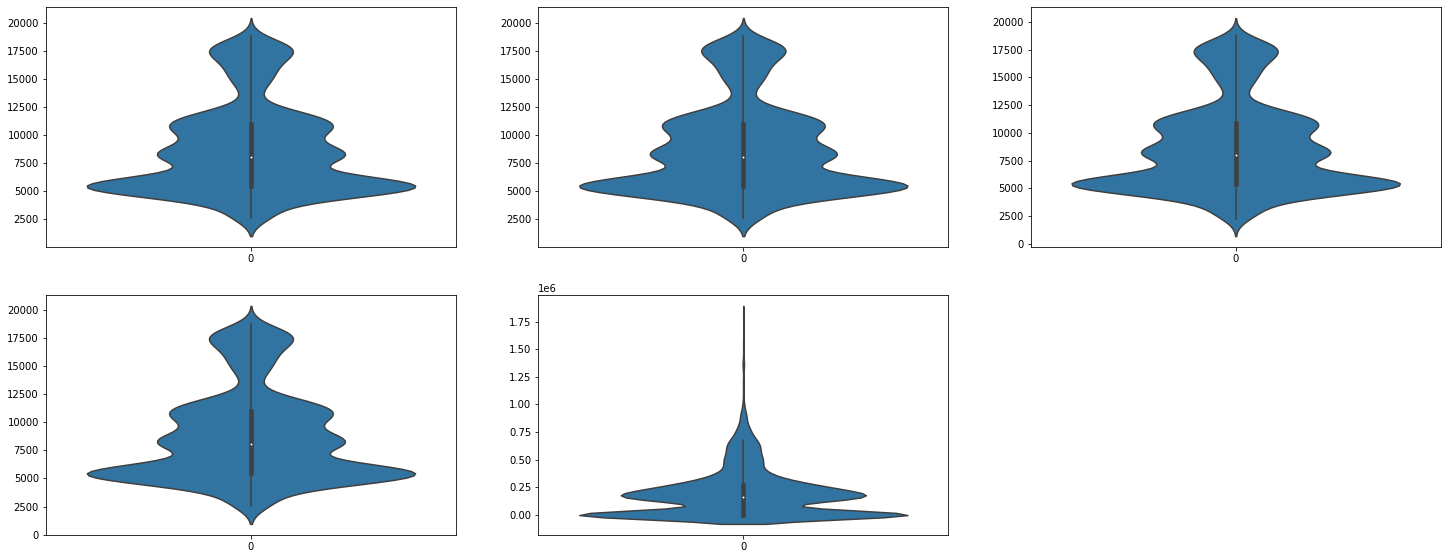

In [15]:
#Plotting the values of different parametrs separately in the form of violinplot
plt.subplots(figsize=(25,15))
for i, col in enumerate(features):
  plt.subplot(3,3,i+1)
  sb.violinplot(df[col])
plt.show()

In [16]:
# Split the date into different columns of day, month and year
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0,19,9,2007
1,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0,20,9,2007
2,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0,21,9,2007
3,2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,0.0,24,9,2007
4,2007-09-25,4939.100098,4953.899902,4878.149902,4938.850098,0.0,25,9,2007


In [17]:
#Checking whether the date is quarter end( i.e. month is divisible by 3)
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0,19,9,2007,1
1,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0,20,9,2007,1
2,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0,21,9,2007,1
3,2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,0.0,24,9,2007,1
4,2007-09-25,4939.100098,4953.899902,4878.149902,4938.850098,0.0,25,9,2007,1


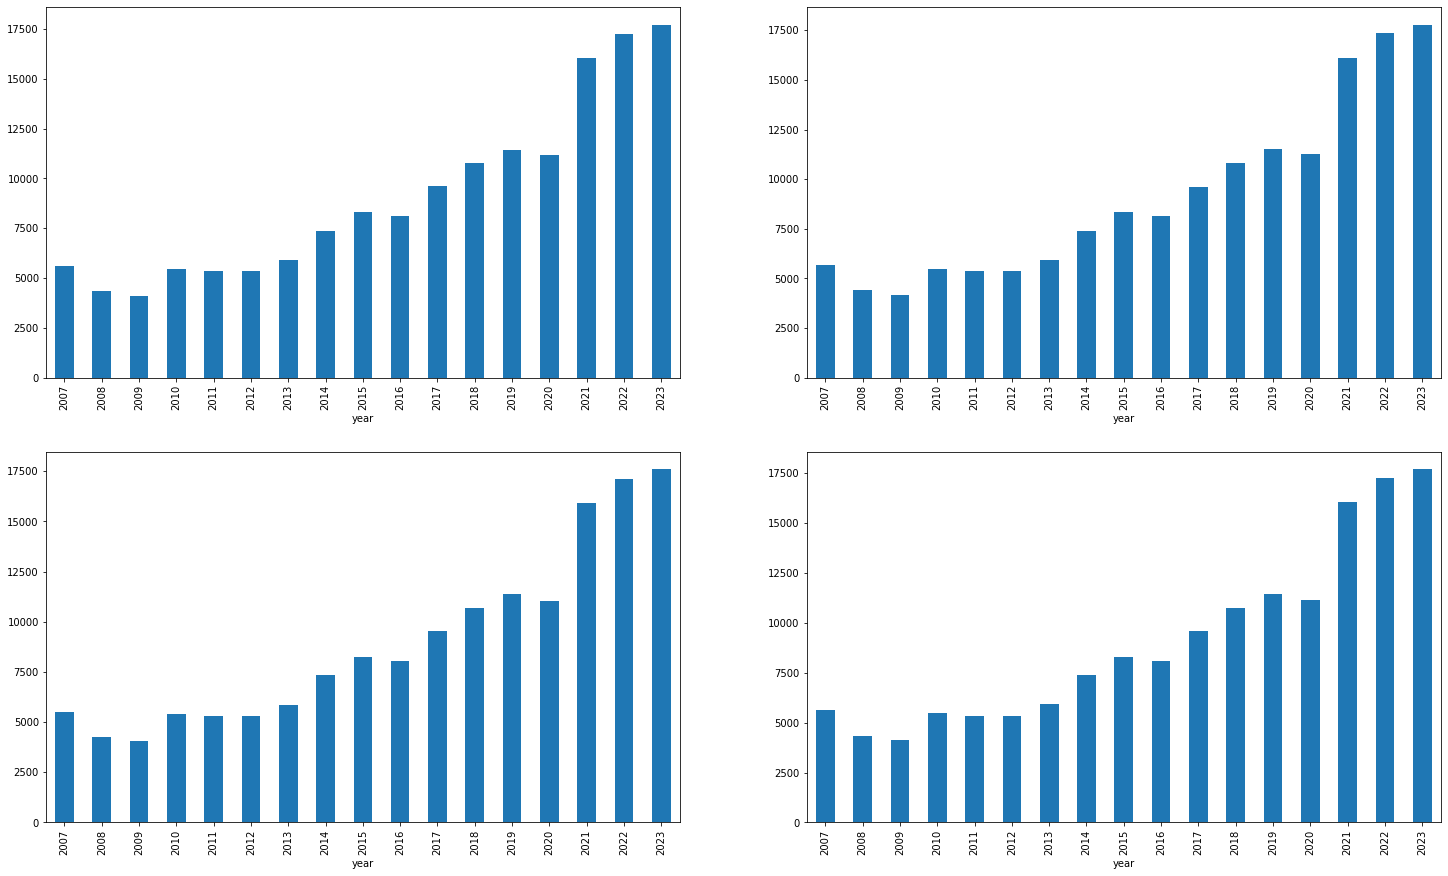

In [18]:
#year-wise data of all the parameters
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(25,15))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [19]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,8790.117816,8840.124376,8724.239419,8783.360734,194936.189717,15.815385,5.987771,2014.992899
1,8832.153287,8885.212480,8765.807285,8826.665550,196963.369397,15.711094,7.550847,2014.958398


From the above data, we can infer that surpirisingly there is no effect of quarter end on the volume of trade taking place.


In [20]:
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

The code is making a new column in the dataframe giving the value of target 1(TRUE), if the closing price of following day is more than the closing price of current day, otherwise returns 0(FALSE).

The target would help in making the decision whether we should buy the stock or not.


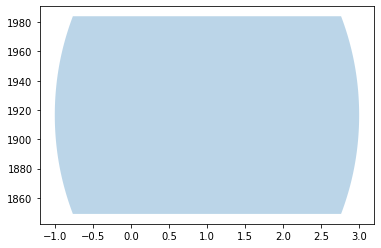

In [21]:
plt.violinplot(df['target'].value_counts().values,widths=4,showmeans=False, showmedians=False, showextrema=False)
plt.show()

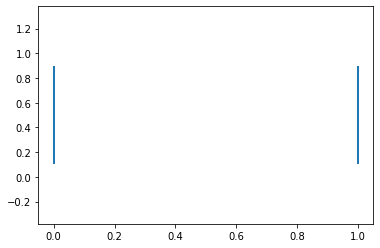

In [22]:
plt.eventplot(df['target'], lineoffsets=0.5, linelengths=0.8)
plt.show()

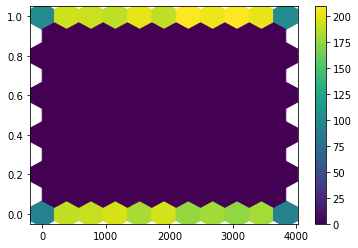

In [23]:
plt.scatter(range(len(df)), df['target'])

plt.hexbin(range(len(df)), df['target'], gridsize=10)

plt.colorbar()

plt.show()

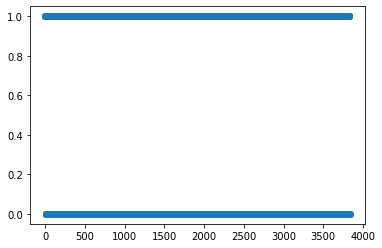

In [24]:
plt.scatter(range(len(df)), df['target'])
plt.show()

In [25]:
df['open-close']  = df['Open'] - df['Close']

In [26]:
df['high-low']  = df['High'] - df['Low']

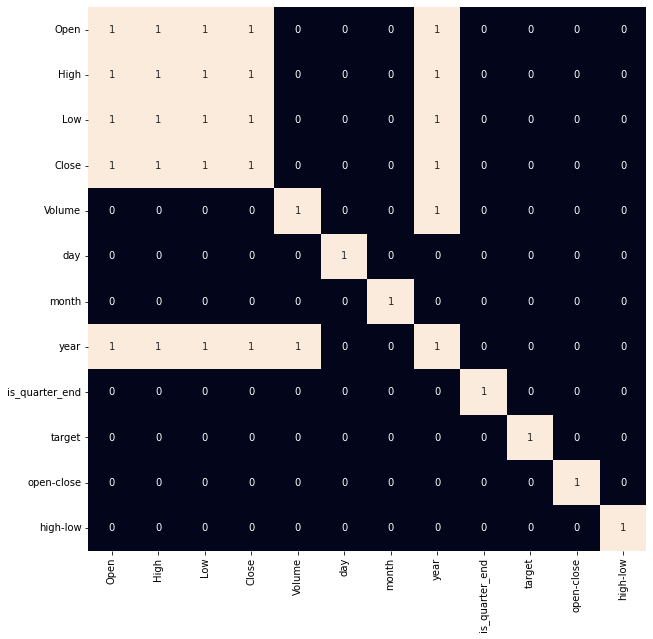

In [27]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [28]:
df=df.dropna()
subcategories = df[['open-close', 'high-low', 'is_quarter_end']]
target = df['target']
 
scale = StandardScaler()
subcategories= scale.fit_transform(subcategories)

X_train, X_valid, Y_train, Y_valid = train_test_split(subcategories, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_valid.shape)

(3042, 3) (761, 3)


In [31]:
#Calculating the accuracy of the model
models = [LogisticRegression()]
for i in range(1):
  models[i].fit(X_train, Y_train)
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()
  print()

Training Accuracy :  0.5272105648426437
Validation Accuracy :  0.5381745040921071


